In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('gdrive/My Drive/flightdelay/flights.csv')
data_airlines = pd.read_csv('gdrive/My Drive/flightdelay/airlines.csv')
data_airports = pd.read_csv('gdrive/My Drive/flightdelay/airports.csv')

In [4]:
data['DATE'] = pd.to_datetime(data[['YEAR','MONTH', 'DAY']])

In [5]:
merged_data = pd.merge(data, data_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
merged_data.drop('IATA_CODE', axis=1, inplace=True)
merged_data.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

In [6]:
df = pd.merge(merged_data, data_airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
df.drop(['IATA_CODE','LATITUDE','LONGITUDE'], axis=1, inplace=True)

In [7]:
print("Average AIR_SYSTEM_DELAY of a flight is:", df.AIR_SYSTEM_DELAY.sum()/df[df.AIR_SYSTEM_DELAY.notnull()==True].AIR_SYSTEM_DELAY.count(),"minutes")
print("Average SECURITY_DELAY of a flight is:", df.SECURITY_DELAY.sum()/df[df.SECURITY_DELAY.notnull()==True].SECURITY_DELAY.count(),'minutes')
print("Average AIRLINE_DELAY of a flight is:", df.AIRLINE_DELAY.sum()/df[df.AIRLINE_DELAY.notnull()==True].AIRLINE_DELAY.count(),'minutes')
print("Average LATE_AIRCRAFT_DELAY of a flight is:", df.LATE_AIRCRAFT_DELAY.sum()/df[df.LATE_AIRCRAFT_DELAY.notnull()==True].LATE_AIRCRAFT_DELAY.count(),'minutes')
print("Average WEATHER_DELAY of a flight is:", df.WEATHER_DELAY.sum()/df[df.WEATHER_DELAY.notnull()==True].WEATHER_DELAY.count(),'minutes')

print("Avg ARRIVAL_DELAY of a flight is:",df[df.ARRIVAL_DELAY >0].ARRIVAL_DELAY.sum()/df[df.ARRIVAL_DELAY.notnull()==True].ARRIVAL_DELAY.count(),'minutes')
print("Avg DEPARTURE_DELAY of a flight is:",df[df.DEPARTURE_DELAY >0].DEPARTURE_DELAY.sum()/df[df.DEPARTURE_DELAY.notnull()==True].DEPARTURE_DELAY.count(),'minutes')

Average AIR_SYSTEM_DELAY of a flight is: 13.487746172859193 minutes
Average SECURITY_DELAY of a flight is: 0.07768398182108116 minutes
Average AIRLINE_DELAY of a flight is: 18.903429476957424 minutes
Average LATE_AIRCRAFT_DELAY of a flight is: 23.688082044331047 minutes
Average WEATHER_DELAY of a flight is: 2.9809918673257854 minutes
Avg ARRIVAL_DELAY of a flight is: 12.482063340043165 minutes
Avg DEPARTURE_DELAY of a flight is: 12.492233144729573 minutes


Mostly flights are delayed due to Late_Aircraft_delay and least due to Weather delay

In [8]:
df['CANCELLATION_REASON']=df.CANCELLATION_REASON.replace({'A':'Airline/Carrier','B':'Weather','C':'National Air System','D':'Security',np.nan:0})
df.CANCELLATION_REASON.value_counts()

0                      5245484
Weather                  47874
Airline/Carrier          24309
National Air System      15225
Security                    22
Name: CANCELLATION_REASON, dtype: int64

Southwest has the maximum number of cancellation rate

In [9]:
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].replace({1:'MONDAY',2:'TUESDAY',3:'WEDNESDAY',4:'THURSDAY',5:'FRIDAY',6:'SATURDAY',7:'SUNDAY'})
df['MONTH'] = df['MONTH'].replace({1:'JAN',2:'FEB',3:'MAR',4:'APRIL',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'})

In [10]:
AIRLINE=['United Air Lines Inc.','American Airlines Inc.','US Airways Inc.','Frontier Airlines Inc.','JetBlue Airways',
         'Skywest Airlines Inc.','Alaska Airlines Inc.','Spirit Air Lines','Southwest Airlines Co.','Delta Air Lines Inc.',
         'Atlantic Southeast Airlines','Hawaiian Airlines Inc.','American Eagle Airlines Inc.','Virgin America']
Delayed_percentage= []
for i in AIRLINE:
    Delayed_percentage.append(100* (len((df[df.AIRLINE==i])[df[df.AIRLINE==i].ARRIVAL_DELAY>0])/len(df[df.AIRLINE==i])))
    print(i, "Percent of delayed flights:%0.2f" %round(100* (len((df[df.AIRLINE==i])[df[df.AIRLINE==i].ARRIVAL_DELAY>0])/len(df[df.AIRLINE==i])),2))


United Air Lines Inc. Percent of delayed flights:37.14
American Airlines Inc. Percent of delayed flights:35.39
US Airways Inc. Percent of delayed flights:38.39
Frontier Airlines Inc. Percent of delayed flights:46.76
JetBlue Airways Percent of delayed flights:38.28
Skywest Airlines Inc. Percent of delayed flights:38.14
Alaska Airlines Inc. Percent of delayed flights:33.19
Spirit Air Lines Percent of delayed flights:49.11
Southwest Airlines Co. Percent of delayed flights:38.02
Delta Air Lines Inc. Percent of delayed flights:29.36
Atlantic Southeast Airlines Percent of delayed flights:37.61
Hawaiian Airlines Inc. Percent of delayed flights:39.89
American Eagle Airlines Inc. Percent of delayed flights:36.22
Virgin America Percent of delayed flights:39.41


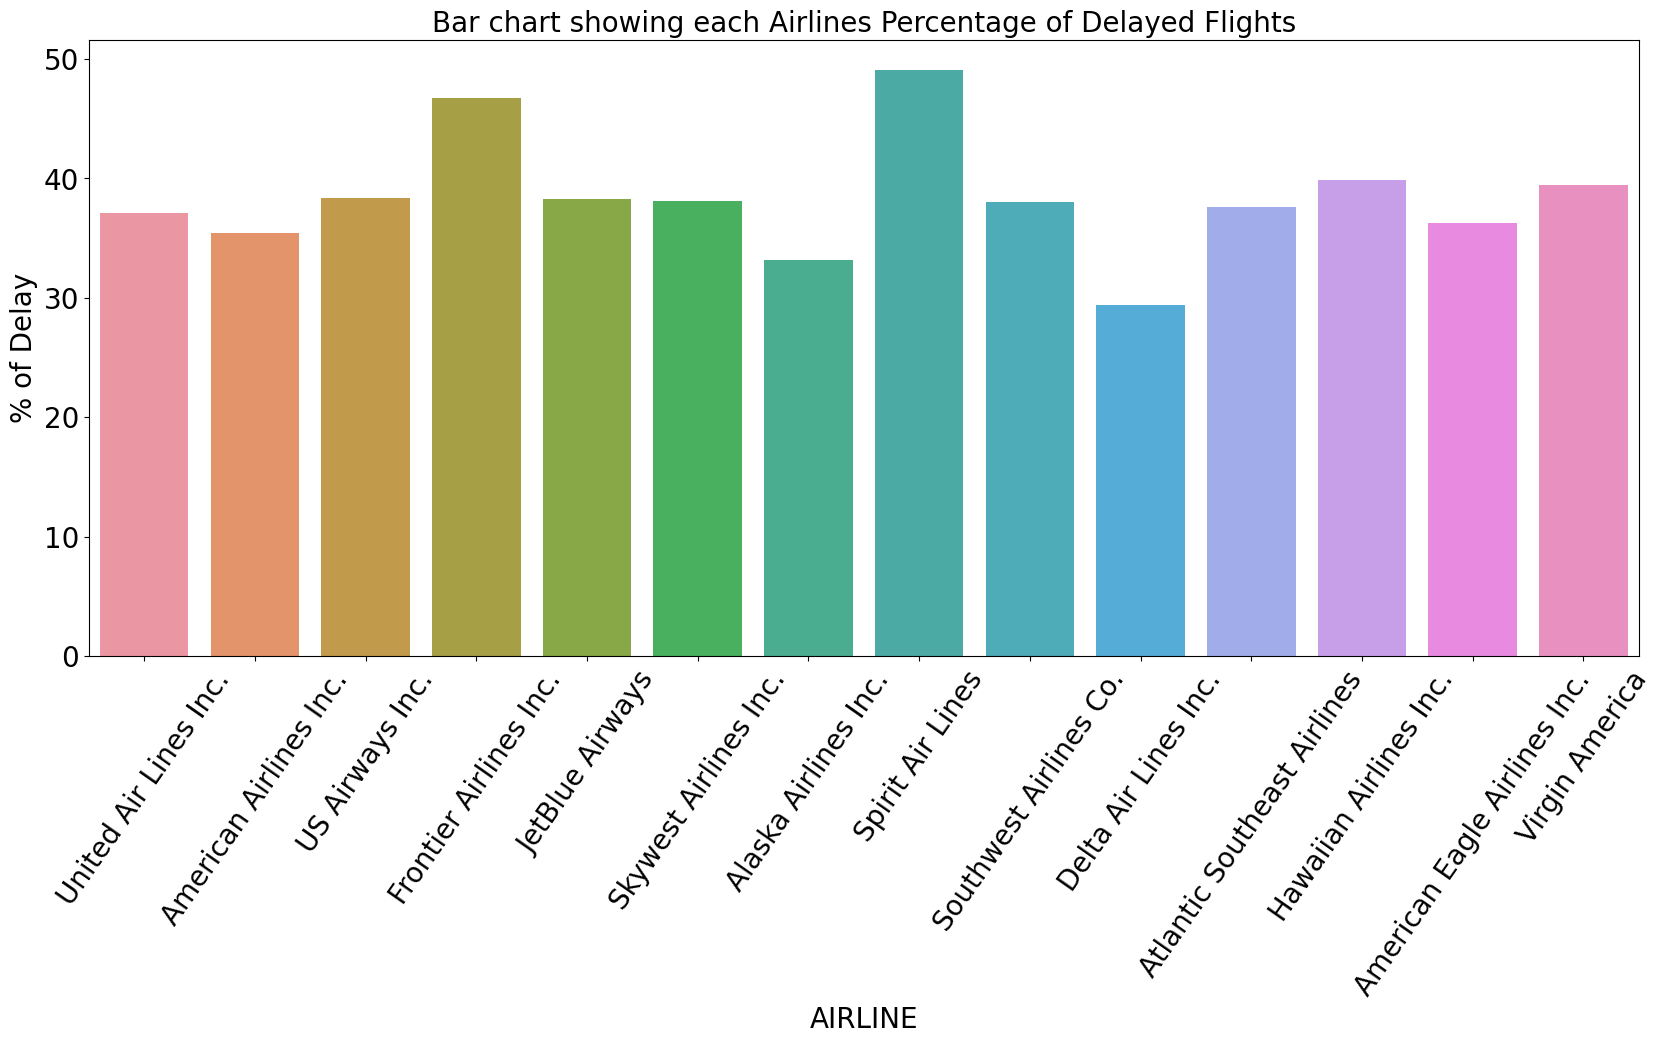

In [11]:
D = pd.DataFrame({'airline': AIRLINE ,'val': Delayed_percentage})
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
plt.tick_params(labelsize = 20)
ax = sns.barplot(x = 'airline', y = 'val',
              data = D,ax=ax)
plt.xlabel('AIRLINE',fontsize=20)
plt.ylabel('% of Delay', fontsize=20)
plt.title("Bar chart showing each Airlines Percentage of Delayed Flights", fontsize=20)
plt.xticks(rotation=55)
plt.show()

Percentage of flight delay is maximum for Spirit Air Lines and least for Delta Air Lines Inc.

In [1]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize = 20)
sns.barplot(x=df.values, y=df.index, alpha=0.8)
sns.boxplot(df.AIRLINE,df[df.ARRIVAL_DELAY>0].ARRIVAL_DELAY)
plt.title('Box plot for Arrival delay for each airline',fontsize=20)
plt.xlabel('AIRLINE', fontsize=20)
plt.ylabel('ARRIVAL_DELAY', fontsize=20)
plt.ylim(0,150)
plt.xticks(rotation=45)

NameError: ignored

The maximum variation in airline delay is for Spirit Air Lines and least is for Hawaiian Airlines Inc.

In [ ]:
df.groupby('AIRLINE')['ARRIVAL_DELAY'].count()

AIRLINE
Alaska Airlines Inc.             157025
American Airlines Inc.           636554
American Eagle Airlines Inc.     257130
Atlantic Southeast Airlines      509621
Delta Air Lines Inc.             794817
Frontier Airlines Inc.            82005
Hawaiian Airlines Inc.            69815
JetBlue Airways                  240304
Skywest Airlines Inc.            528328
Southwest Airlines Co.          1138350
Spirit Air Lines                 105059
US Airways Inc.                  194223
United Air Lines Inc.            462086
Virgin America                    55813
Name: ARRIVAL_DELAY, dtype: int64

Maximum number of flight delays is for Southwest Air Lines and least for Virgin America

Text(0.5, 1.0, 'Bar chart for Number of flights delayed from each airline')

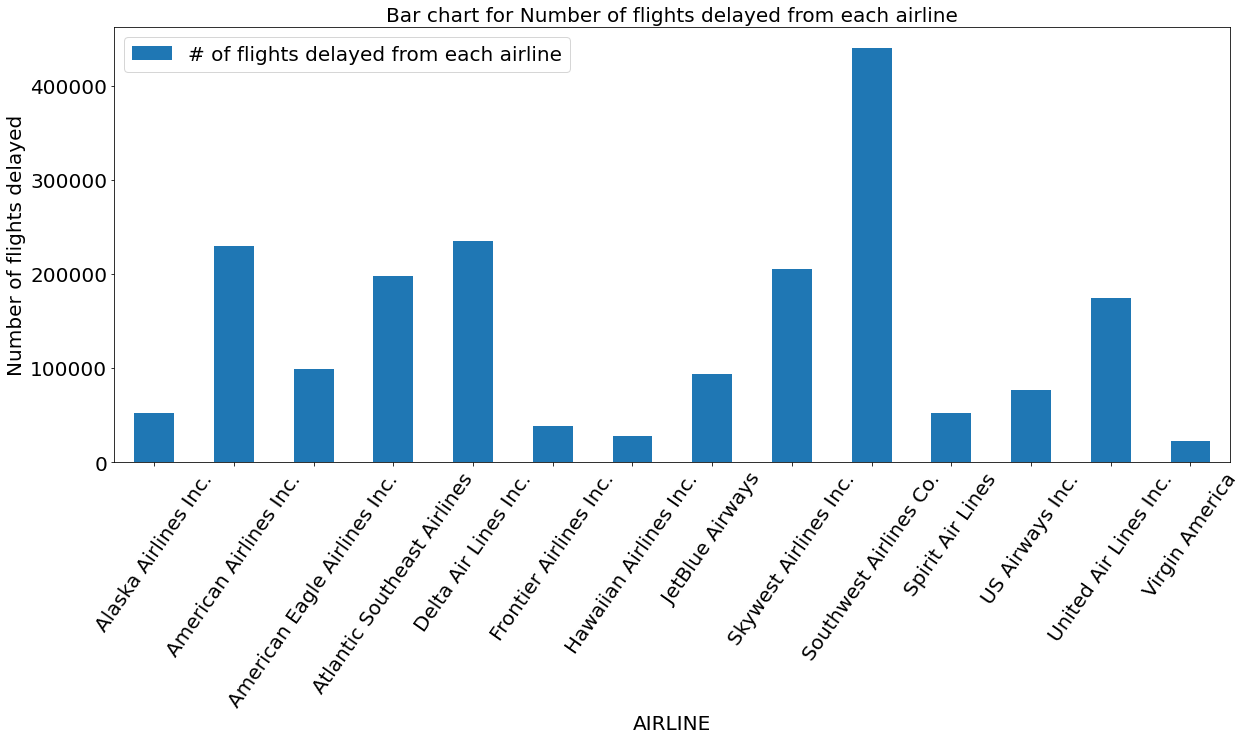

In [ ]:
pd.DataFrame({'# of flights delayed from each airline' :df[df.ARRIVAL_DELAY >0].groupby('AIRLINE')['ARRIVAL_DELAY'].count()}).plot(kind='bar',rot=55,figsize=(20,8),fontsize=20)
plt.xlabel("AIRLINE",fontsize=20)
plt.ylabel("Number of flights delayed",fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title("Bar chart for Number of flights delayed from each airline", fontsize=20)

Southwest has the maximum number of delayed flights

Text(0.5, 1.0, 'Bar chart for Number of flights delayed from each State')

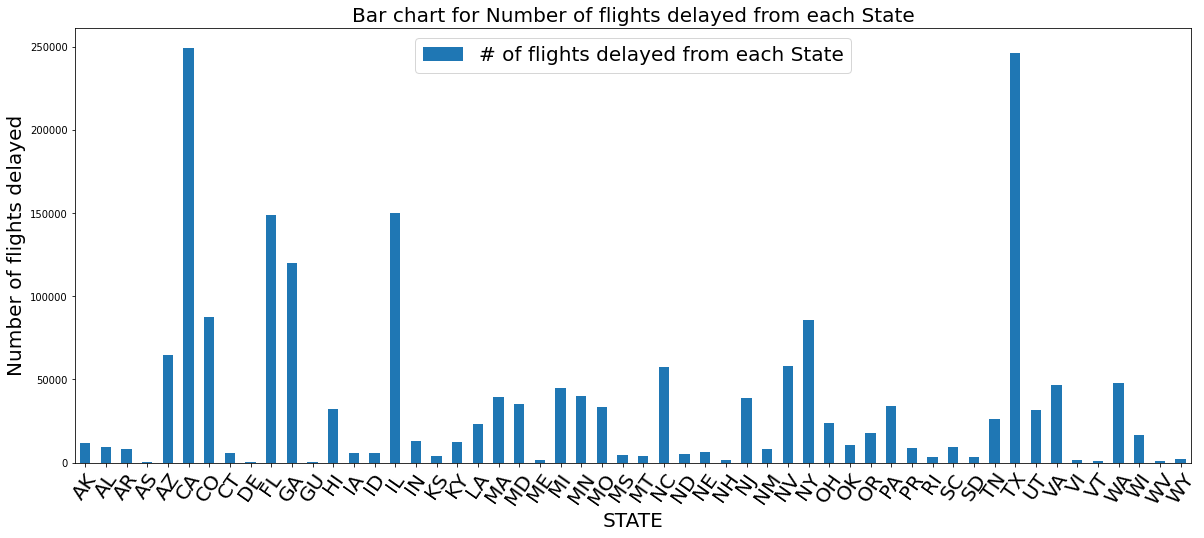

In [ ]:
pd.DataFrame({'# of flights delayed from each State' :df[df.ARRIVAL_DELAY >0].groupby('STATE')['ARRIVAL_DELAY'].count()}).plot(kind='bar',rot=55,figsize=(20,8))
plt.xlabel("STATE",fontsize=20)
plt.ylabel("Number of flights delayed",fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title("Bar chart for Number of flights delayed from each State", fontsize=20)

Maximum flight delays are in California(CA) followed by Texas(TX) and none from Arkansas(AS), Delaware(DE), Guam(GU).

Text(0.5, 1.0, 'Bar chart for Number of flights delayed for each Month')

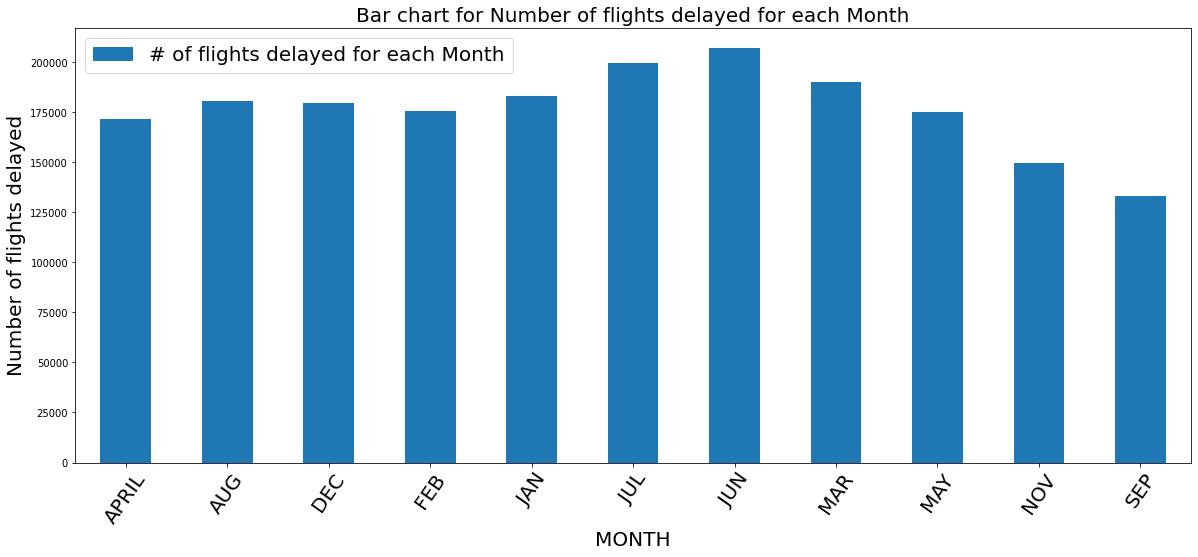

In [ ]:
pd.DataFrame({'# of flights delayed for each Month' :df[df.ARRIVAL_DELAY >0].groupby('MONTH')['ARRIVAL_DELAY'].count()}).plot(kind='bar',rot=55,figsize=(20,8))
plt.xlabel("MONTH",fontsize=20)
plt.ylabel("Number of flights delayed",fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.title("Bar chart for Number of flights delayed for each Month", fontsize=20)

Maximum flight delays takes place in the month of June and least in month of September

In [ ]:
mon=['JAN','FEB','MAR','APRIL','MAY','JUN','AUG','SEP','OCT','NOV','DEC']
djan=[]
dfeb=[]
dmar=[]
dapril=[]
dmay=[]
djun=[]
djul=[]
daug=[]
dsep=[]
dnov=[]
ddec=[]
days=['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']


for i in range(0,31):
    djan.append(len(df[(df.MONTH == 'JAN') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dfeb.append(len(df[(df.MONTH == 'FEB') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dmar.append(len(df[(df.MONTH == 'MAR') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dapril.append(len(df[(df.MONTH == 'APRIL') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dmay.append(len(df[(df.MONTH == 'MAY') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    djun.append(len(df[(df.MONTH == 'JUN') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    djul.append(len(df[(df.MONTH == 'JUL') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    daug.append(len(df[(df.MONTH == 'AUG') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dsep.append(len(df[(df.MONTH == 'SEP') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    dnov.append(len(df[(df.MONTH == 'NOV') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))
    ddec.append(len(df[(df.MONTH == 'DEC') & (df.DAY == i+1) & (df.ARRIVAL_DELAY > 0)]))

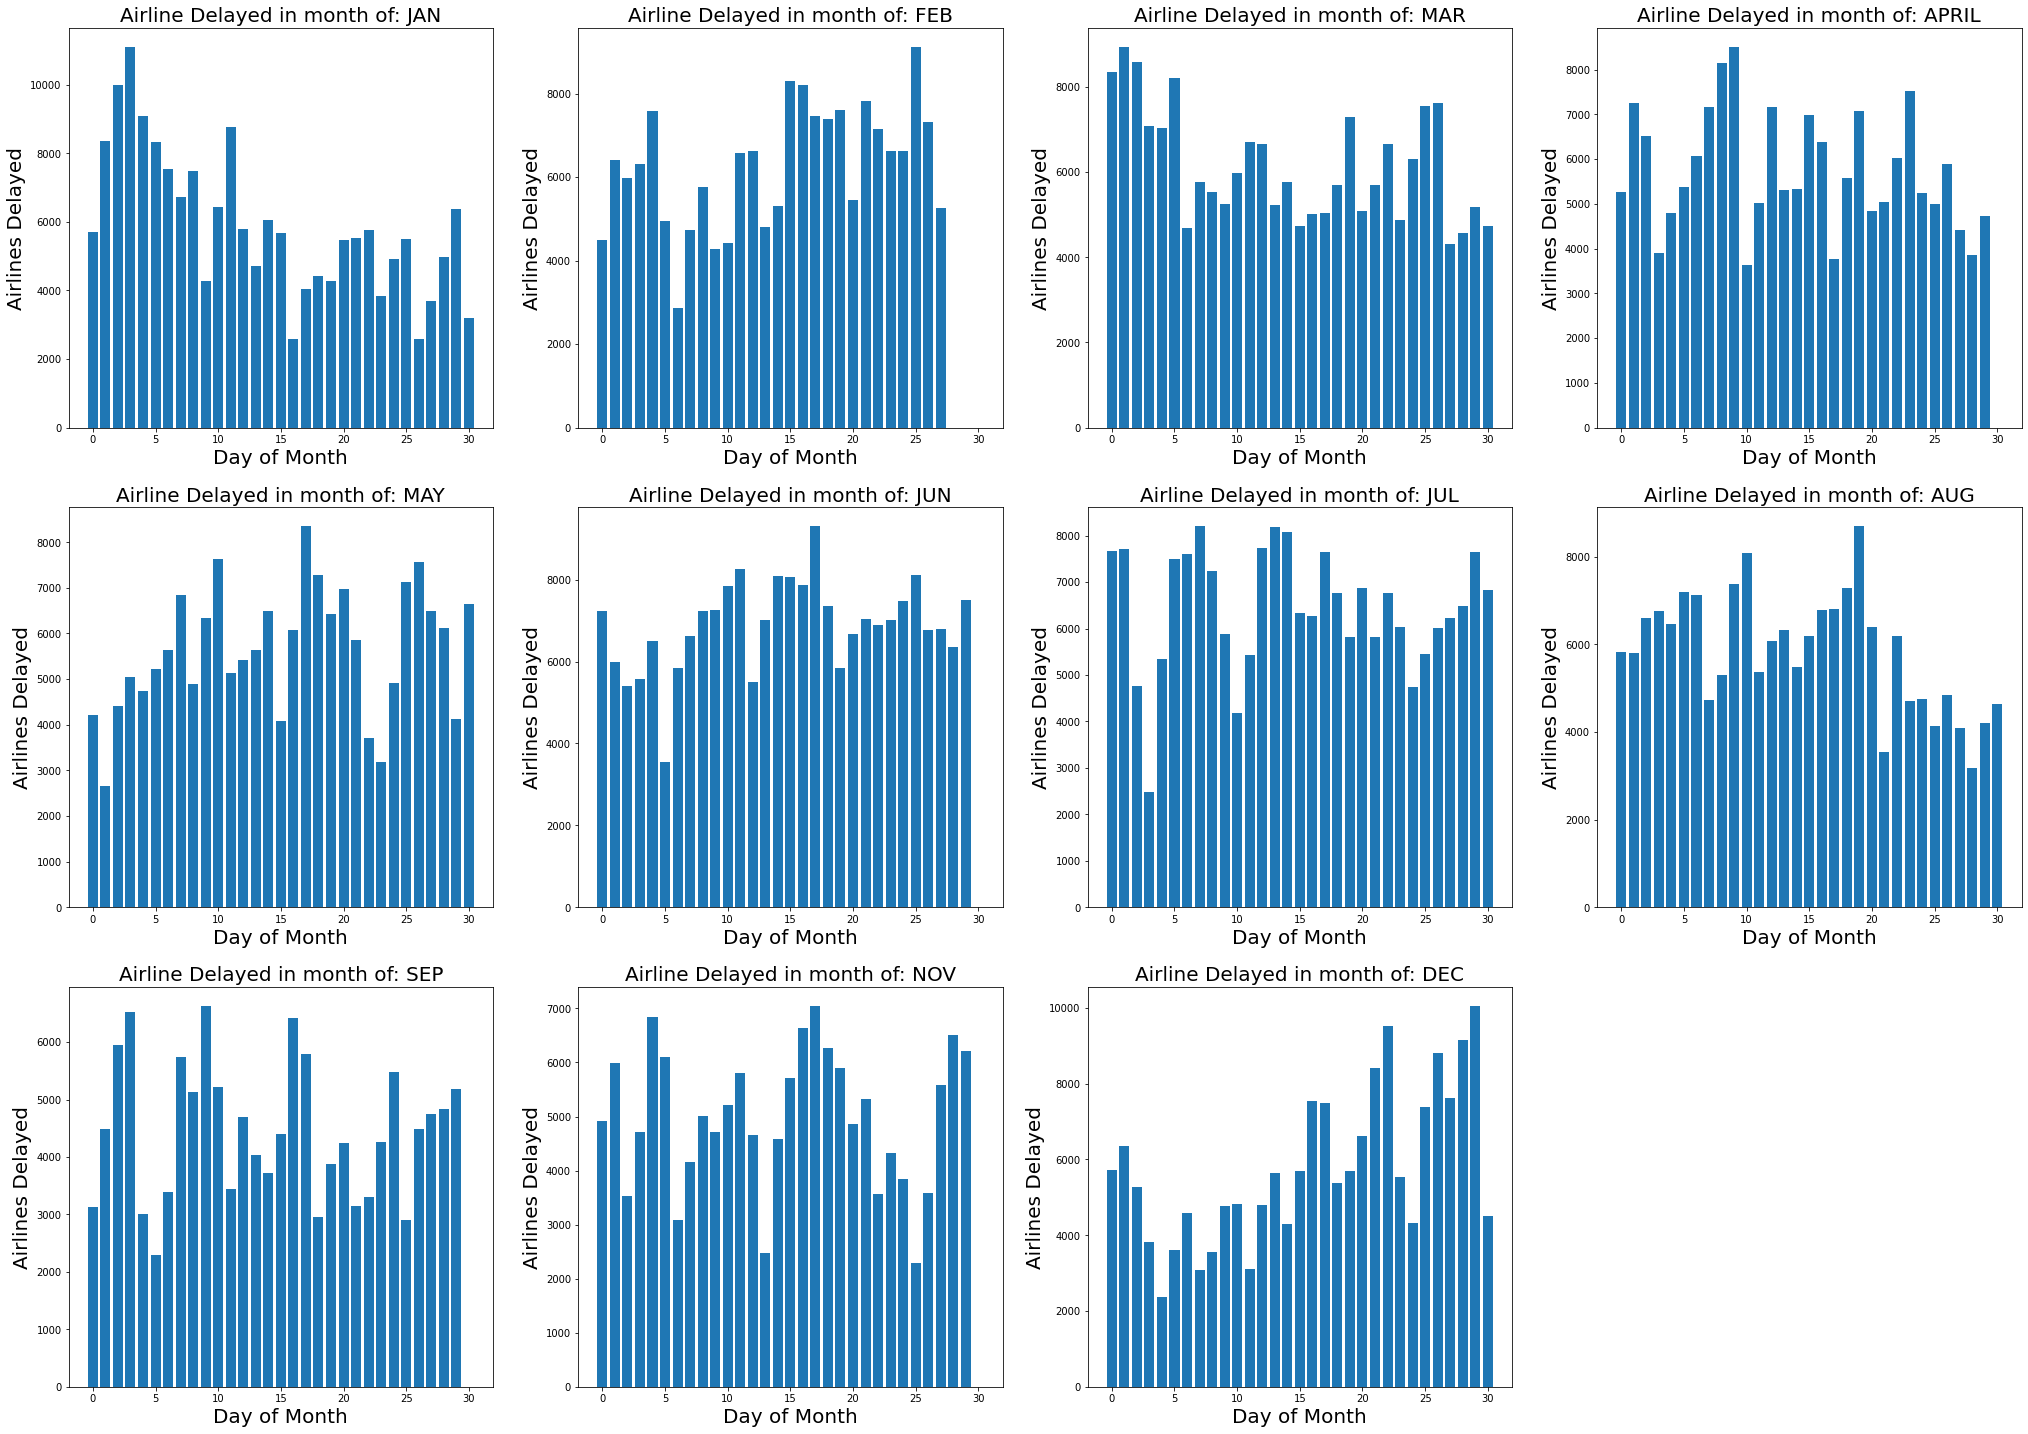

In [ ]:
plt.figure(figsize=(35,25))
dat=(djan,dfeb,dmar, dapril, dmay, djun, djul, daug, dsep, dnov, ddec)
mon=['JAN','FEB','MAR','APRIL','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
plot_no = 1
k=0
for i,c in zip(dat,range(1,13)):
    ax = plt.subplot(3,4,plot_no)
    ax.bar(np.arange(0,31),i)
    plt.xlabel('Day of Month', fontsize=20)
    plt.ylabel('Airlines Delayed', fontsize=20)
    plt.title(("Airline Delayed in month of: %s" %mon[k]),fontsize=20)
    k = k+1
    plot_no=plot_no + 1
fig.show()

Probability of flights to be delayed is high during the first week of the month but as such there is no observable trend in delay as per the Date.

Text(0.5, 1.0, 'Box plot for Arrival delay for each month')

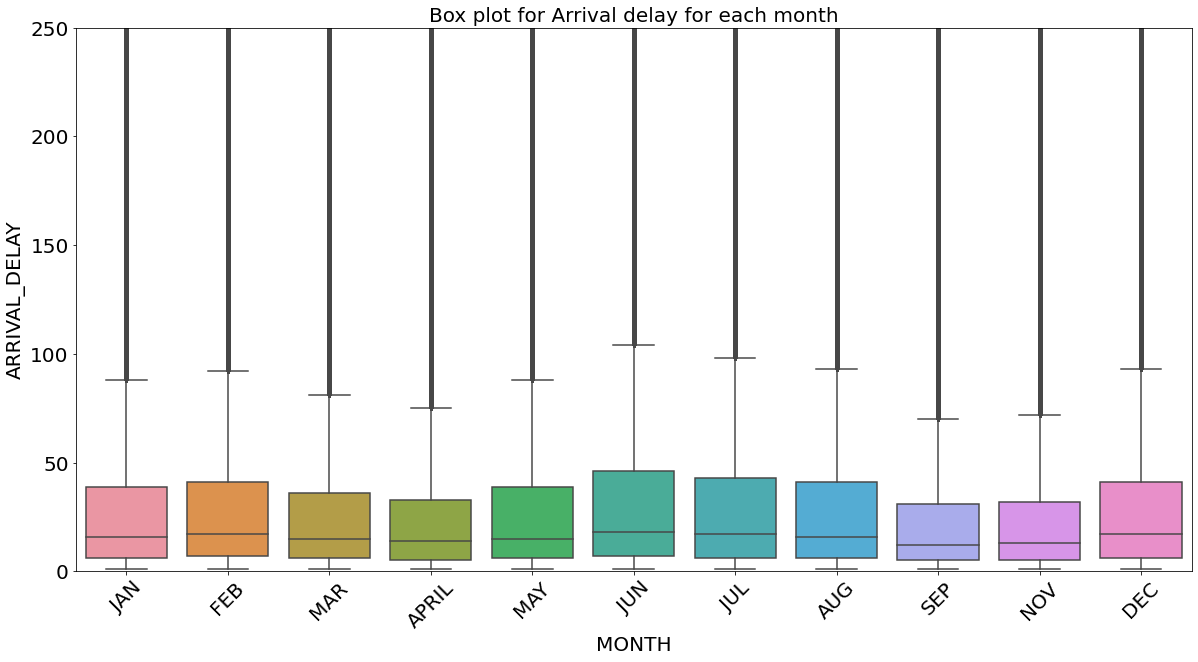

In [ ]:
plt.figure(figsize=(20,10))
plt.tick_params(labelsize = 20)
sns.boxplot(df.MONTH,df[df.ARRIVAL_DELAY>0].ARRIVAL_DELAY)
plt.ylim(0,250)
plt.xticks(rotation=45)
plt.xlabel("MONTH",fontsize=20)
plt.ylabel("ARRIVAL_DELAY",fontsize=20)
plt.title("Box plot for Arrival delay for each month", fontsize=20)

Maximum variation in arrival delay is in the month of June and is is small and almost equal for April, September and November respectively.


Alaska Airlines on average have trend of arriving early than the scheduled arrival time and Spirit Air Lines on average are arriving late than the scheduled arrival time

Hawaiian Airlines Inc. on average have trend of departing with very less delay than the scheduled departure time and Spirit Air Lines on average are departing late than the scheduled departure time


Text(0.5, 1.0, 'Pie chart for number of flights for each airline')

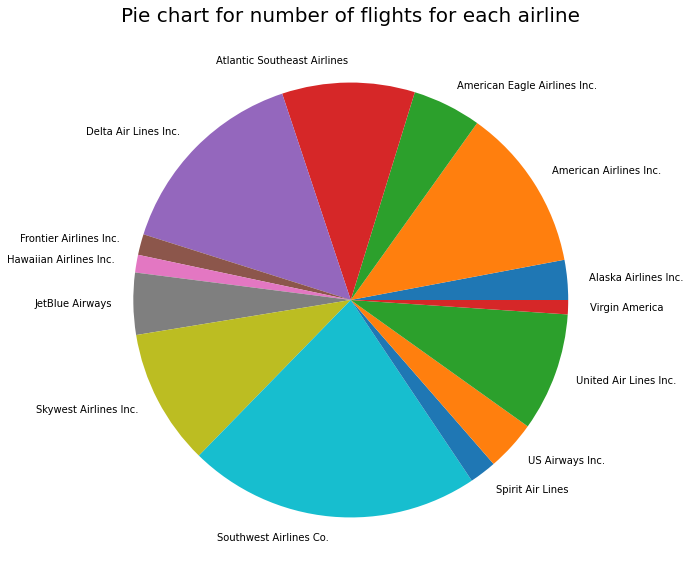

In [ ]:
df.groupby('AIRLINE')['FLIGHT_NUMBER'].count().plot.pie(figsize=(10,10),rot=45)
plt.ylabel('',fontsize=30)
plt.title("Pie chart for number of flights for each airline",fontsize=20)

In [ ]:
df.groupby('AIRLINE')['FLIGHT_NUMBER'].count()

AIRLINE
Alaska Airlines Inc.             158054
American Airlines Inc.           648694
American Eagle Airlines Inc.     272650
Atlantic Southeast Airlines      526249
Delta Air Lines Inc.             800329
Frontier Airlines Inc.            82735
Hawaiian Airlines Inc.            70030
JetBlue Airways                  245135
Skywest Airlines Inc.            539545
Southwest Airlines Co.          1157339
Spirit Air Lines                 107171
US Airways Inc.                  198715
United Air Lines Inc.            469829
Virgin America                    56439
Name: FLIGHT_NUMBER, dtype: int64

Total number of flights for Sourthwest Airlines Co. is the maximum and least for Virgin America

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5332913
Data columns (total 37 columns):
 #   Column               Dtype         
---  ------               -----         
 0   YEAR                 int64         
 1   MONTH                object        
 2   DAY                  int64         
 3   DAY_OF_WEEK          object        
 4   AIRLINE_CODE         object        
 5   FLIGHT_NUMBER        int64         
 6   TAIL_NUMBER          object        
 7   ORIGIN_AIRPORT       object        
 8   DESTINATION_AIRPORT  object        
 9   SCHEDULED_DEPARTURE  int64         
 10  DEPARTURE_TIME       float64       
 11  DEPARTURE_DELAY      float64       
 12  TAXI_OUT             float64       
 13  WHEELS_OFF           float64       
 14  SCHEDULED_TIME       float64       
 15  ELAPSED_TIME         float64       
 16  AIR_TIME             float64       
 17  DISTANCE             int64         
 18  WHEELS_ON            float64       
 19  TAXI_IN              

In [ ]:
def value_range(x):
    if x >=12:
        return 1
    else:
        return 0

In [ ]:
df['ARRIVAL_DELAY_12'] = df['ARRIVAL_DELAY'].apply(value_range)
df['ARRIVAL_DELAY_12'].value_counts()

0    4198928
1    1133986
Name: ARRIVAL_DELAY_12, dtype: int64

In [ ]:
AIRLINE=['United Air Lines Inc.','American Airlines Inc.','US Airways Inc.','Frontier Airlines Inc.','JetBlue Airways',
         'Skywest Airlines Inc.','Alaska Airlines Inc.','Spirit Air Lines','Southwest Airlines Co.','Delta Air Lines Inc.',
         'Atlantic Southeast Airlines','Hawaiian Airlines Inc.','American Eagle Airlines Inc.','Virgin America']
Delayed_12_percentage= []
for i in AIRLINE:
    Delayed_12_percentage.append(100* (len((df[df.AIRLINE==i])[df[df.AIRLINE==i].ARRIVAL_DELAY_12==1])/len(df[df.AIRLINE==i])))
    print(i, "Percent of delayed flights more than 12 minutes:%0.2f" %round(100* (len((df[df.AIRLINE==i])[df[df.AIRLINE==i].ARRIVAL_DELAY_12==1])/len(df[df.AIRLINE==i])),2))

United Air Lines Inc. Percent of delayed flights more than 12 minutes:23.47
American Airlines Inc. Percent of delayed flights more than 12 minutes:20.94
US Airways Inc. Percent of delayed flights more than 12 minutes:21.19
Frontier Airlines Inc. Percent of delayed flights more than 12 minutes:30.02
JetBlue Airways Percent of delayed flights more than 12 minutes:24.88
Skywest Airlines Inc. Percent of delayed flights more than 12 minutes:21.29
Alaska Airlines Inc. Percent of delayed flights more than 12 minutes:15.48
Spirit Air Lines Percent of delayed flights more than 12 minutes:32.91
Southwest Airlines Co. Percent of delayed flights more than 12 minutes:21.99
Delta Air Lines Inc. Percent of delayed flights more than 12 minutes:16.02
Atlantic Southeast Airlines Percent of delayed flights more than 12 minutes:21.98
Hawaiian Airlines Inc. Percent of delayed flights more than 12 minutes:14.50
American Eagle Airlines Inc. Percent of delayed flights more than 12 minutes:23.59
Virgin America

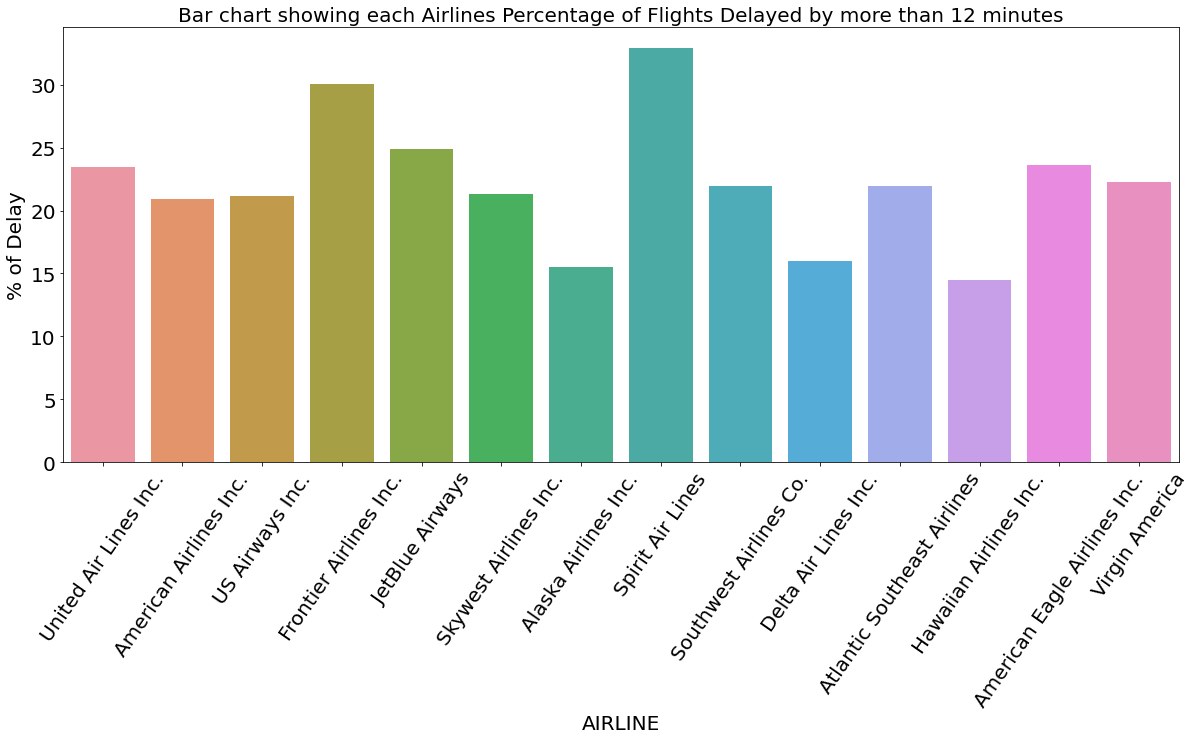

In [ ]:
D2 = pd.DataFrame({'airline': AIRLINE ,'val': Delayed_12_percentage})
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
plt.tick_params(labelsize = 20)
ax = sns.barplot(x = 'airline', y = 'val',
              data = D2,ax=ax)
plt.xlabel('AIRLINE',fontsize=20)
plt.ylabel('% of Delay', fontsize=20)
plt.title("Bar chart showing each Airlines Percentage of Flights Delayed by more than 12 minutes", fontsize=20)
plt.xticks(rotation=55)
plt.show()

Maximum percentage of flight delay more than 12 minutes is for Spirit Air Lines and least for Hawaiian Air Lines Inc.

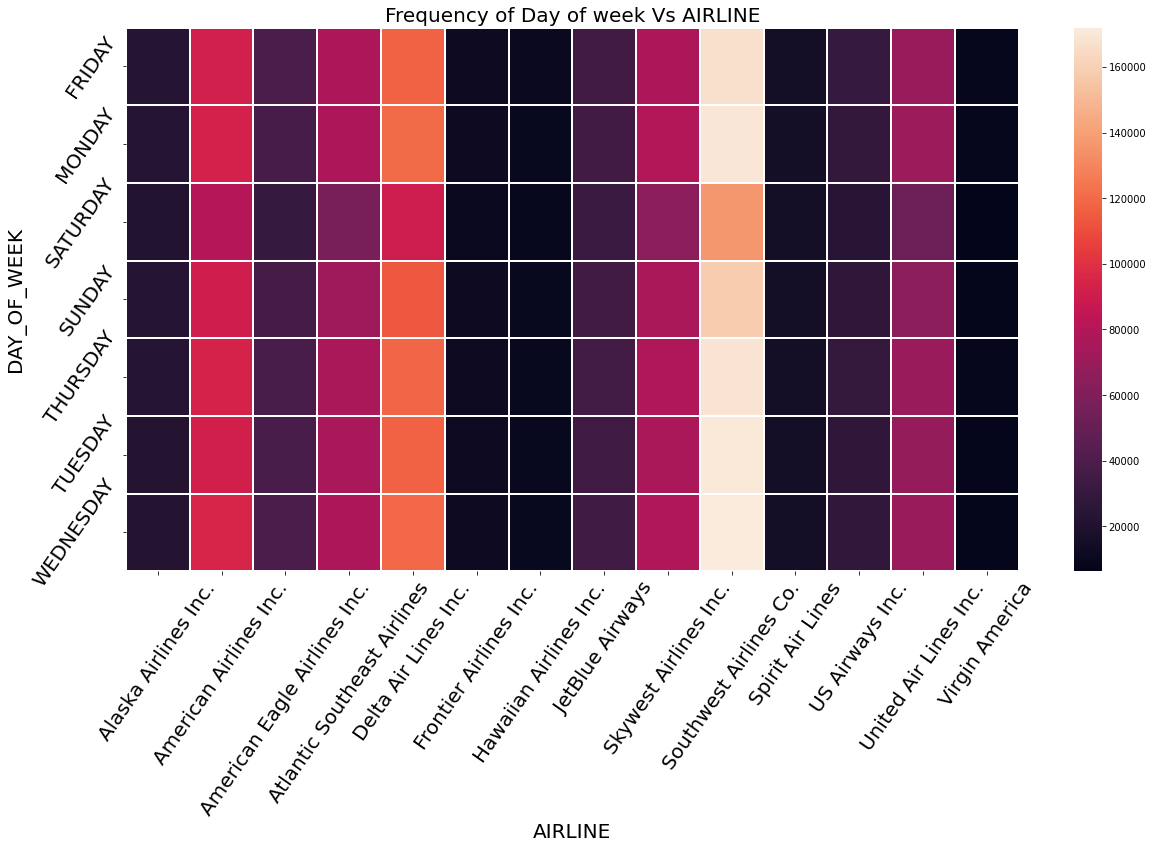

In [ ]:
grouped_df = df.groupby(['DAY_OF_WEEK','AIRLINE'])['DEPARTURE_DELAY'].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('DAY_OF_WEEK','AIRLINE','DEPARTURE_DELAY')

plt.figure(figsize=(20,10))
sns.heatmap(grouped_df,linecolor="w", linewidths=1)
plt.xlabel("AIRLINE", fontsize=20)
plt.ylabel("DAY_OF_WEEK", fontsize=20)
plt.xticks(fontsize=20,rotation=55)
plt.yticks(fontsize=20,rotation=55)
plt.title("Frequency of Day of week Vs AIRLINE",fontsize=20)
plt.show()

On Saturday the frequency of Airlines is least compared to all other days and Maximum frequency on any day is of Southwest Airlines Co. followed by Delta Air Lines Inc.

Number of Scheduled Flights On Saturday is the least and maximum number of flights are on Monday

In [ ]:
df = df.drop(['ELAPSED_TIME','AIR_TIME','TAIL_NUMBER','DISTANCE','WHEELS_OFF','TAIL_NUMBER','DEPARTURE_TIME','WHEELS_ON','YEAR'],axis=1)

In [ ]:
df.dropna(axis=0, subset=['ARRIVAL_DELAY'],how='any',inplace=True)
cols = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
df[cols] = df[cols].replace({np.nan:0,np.nan:0,np.nan:0,np.nan:0})

In [ ]:
j=[0,600,1200,1800,2400]
flights_period=[]
for i in df.loc[:,['SCHEDULED_DEPARTURE']].values:
    for k in range(len(j)):
        if i>j[k] and i<=j[k+1]:
            flights_period.append(k+1)

j=[0,600,1200,1800,2400]
flights_period1=[]
for i in df.loc[:,['SCHEDULED_ARRIVAL']].values:
    for k in range(len(j)):
        if i>j[k] and i<=j[k+1]:
            flights_period1.append(k+1)

In [ ]:
flights_depart=pd.DataFrame(flights_period)
flights_arrival=pd.DataFrame(flights_period1)
flights_depart.rename(columns={0: 'flights_depart'}, inplace=True)
flights_arrival.rename(columns={0: 'flights_arrival'}, inplace=True)
df=df.drop(['SCHEDULED_DEPARTURE'],axis=1)
df=df.drop(['SCHEDULED_ARRIVAL'],axis=1)
df1=pd.concat([df.iloc[:,:-1],flights_depart,flights_arrival,df.iloc[:,-1]],axis=1)
df1 = df1.reindex(df.index)
df1.dropna(axis=0, subset=['flights_depart','flights_arrival'],how='any',inplace=True)
df1['flights_arrival']=df1['flights_arrival'].replace({1.0: 'Arrival_Morning',2.0: 'Arrival_Afternoon',3.0: 'Arrival_Evening',4.0: 'Arrival_Night'})
df1['flights_depart']=df1['flights_depart'].replace({1.0: 'Departure_Morning',2.0: 'Departure_Afternoon',3.0: 'Departure_Evening',4.0: 'Departure_Night'})

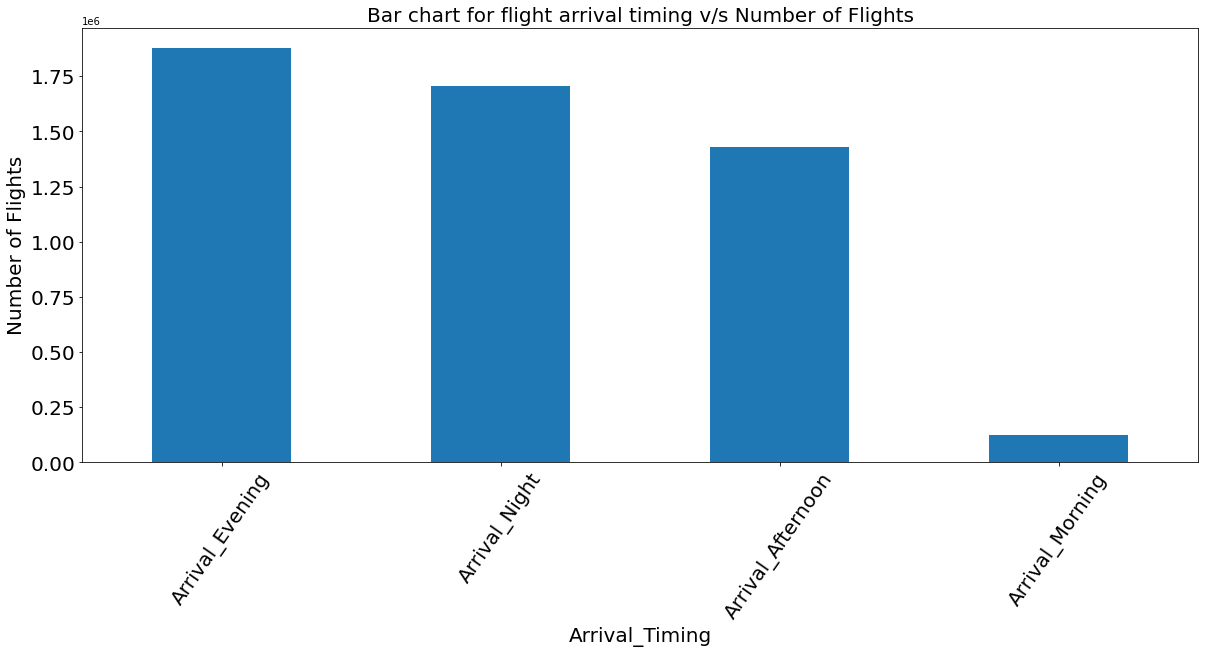

In [ ]:
df1['flights_arrival'].value_counts()[:20].plot(kind='bar',figsize=(20,8))
plt.xlabel("Arrival_Timing", fontsize=20)
plt.ylabel("Number of Flights", fontsize=20)
plt.xticks(fontsize=20,rotation=55)
plt.yticks(fontsize=20)
plt.title("Bar chart for flight arrival timing v/s Number of Flights",fontsize=20)
plt.show()

Maximum flights arrives in Evening i.e. between 12 pm and 6 pm and least in Morning i.e. between 12 am to 6 am

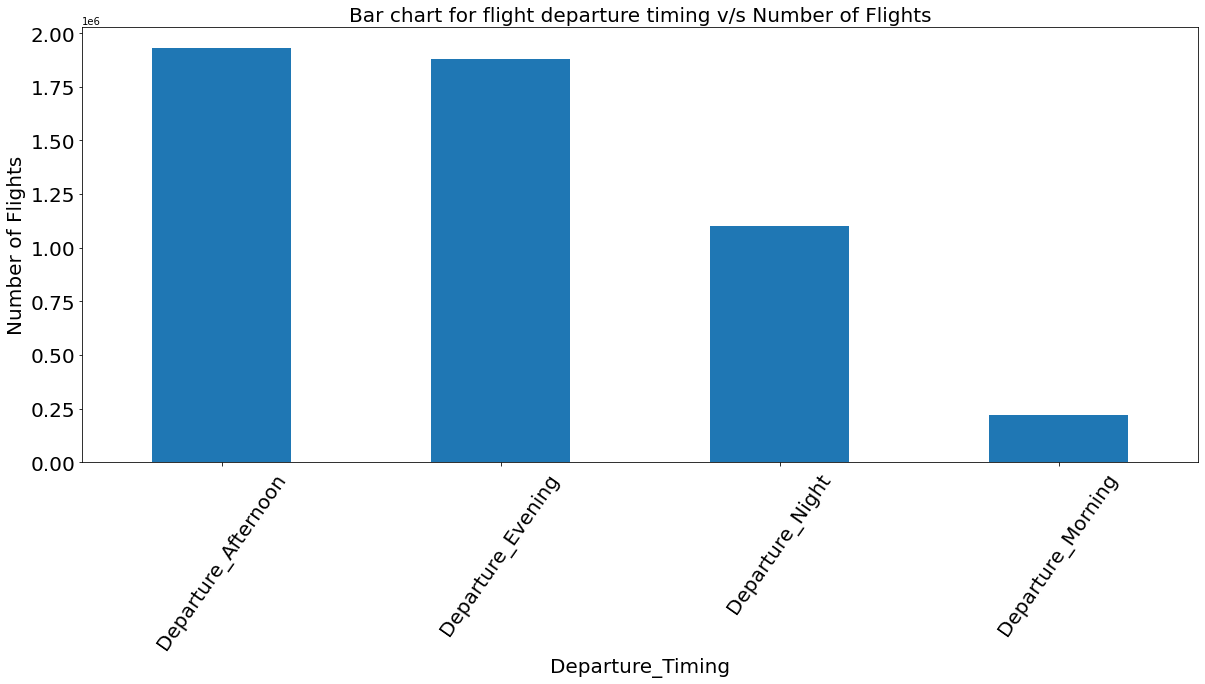

In [ ]:
df1['flights_depart'].value_counts()[:20].plot(kind='bar',figsize=(20,8))
plt.xlabel("Departure_Timing", fontsize=20)
plt.ylabel("Number of Flights", fontsize=20)
plt.xticks(fontsize=20,rotation=55)
plt.yticks(fontsize=20)
plt.title("Bar chart for flight departure timing v/s Number of Flights",fontsize=20)
plt.show()

Maximum flights departs in Afternoon i.e. between 6 am and 12 pm and least in Morning i.e. between 12 am to 6 am

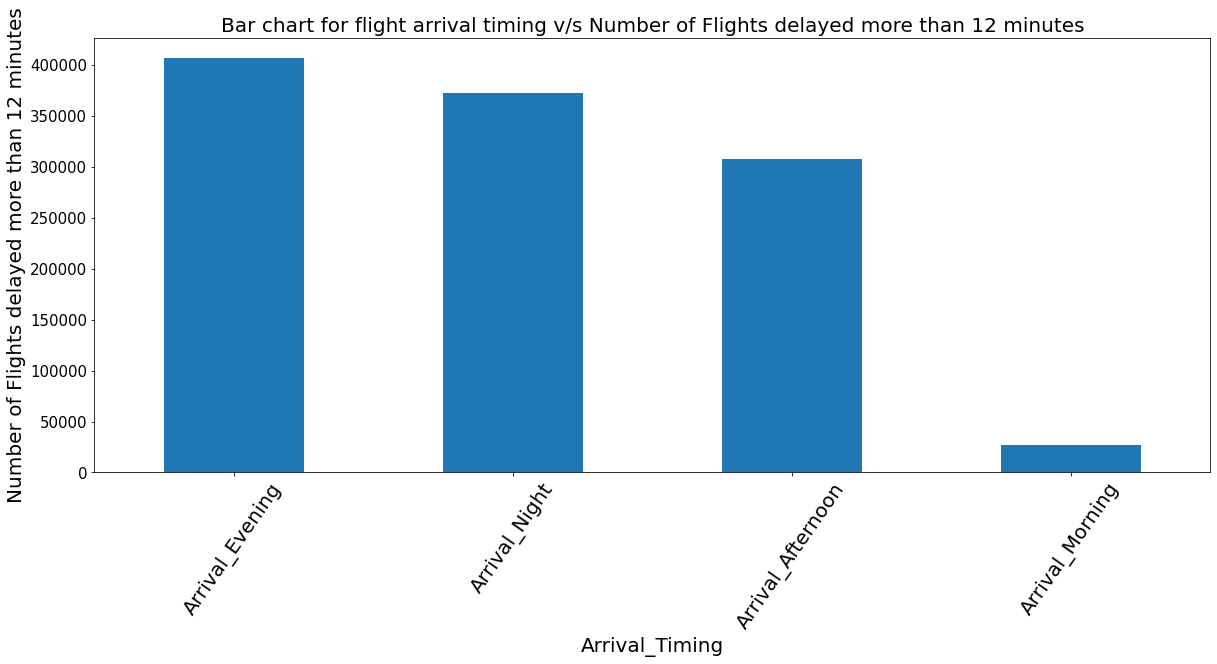

In [ ]:
df1_temp= df1[df1.ARRIVAL_DELAY_12==1]
df1_temp['flights_arrival'].value_counts()[:20].plot(kind='bar',figsize=(20,8))
plt.xlabel("Arrival_Timing", fontsize=20)
plt.ylabel("Number of Flights delayed more than 12 minutes", fontsize=20)
plt.xticks(fontsize=20,rotation=55)
plt.yticks(fontsize=15)
plt.title("Bar chart for flight arrival timing v/s Number of Flights delayed more than 12 minutes",fontsize=20)
plt.show()

Maximum flights that are delayed more than 12 minutes arrives in Evening i.e. between 12 pm and 6 pm and least in Morning i.e. between 12 am to 6 am

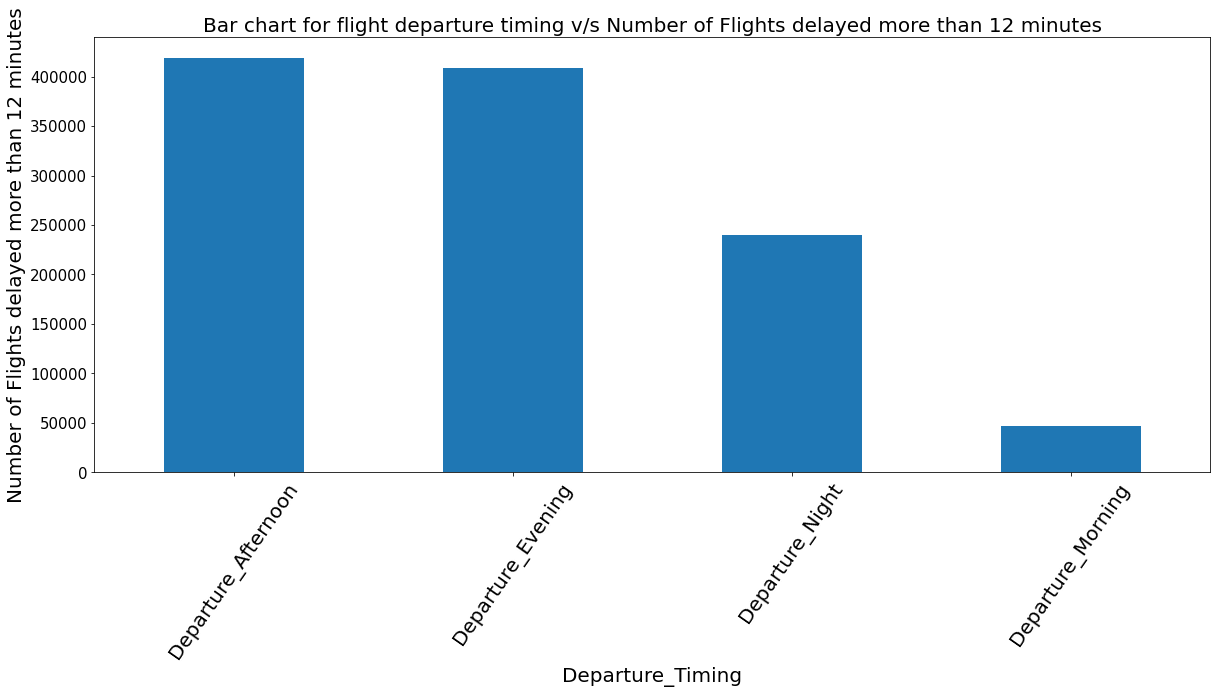

In [ ]:
df1_temp['flights_depart'].value_counts()[:20].plot(kind='bar',figsize=(20,8))
plt.xlabel("Departure_Timing", fontsize=20)
plt.ylabel("Number of Flights delayed more than 12 minutes", fontsize=20)
plt.xticks(fontsize=20,rotation=55)
plt.yticks(fontsize=15)
plt.title("Bar chart for flight departure timing v/s Number of Flights delayed more than 12 minutes",fontsize=20)
plt.show()

Maximum flights that are delayed more than 12 minutes departs in Afternoon i.e. between 6 am and 12 pm and least in Morning i.e. between 12 am to 6 am

In [ ]:
df1.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE_CODE           0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
SCHEDULED_TIME         0
TAXI_IN                0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
DATE                   0
AIRLINE                0
AIRPORT                0
CITY                   0
STATE                  0
COUNTRY                0
flights_depart         0
flights_arrival        0
ARRIVAL_DELAY_12       0
dtype: int64

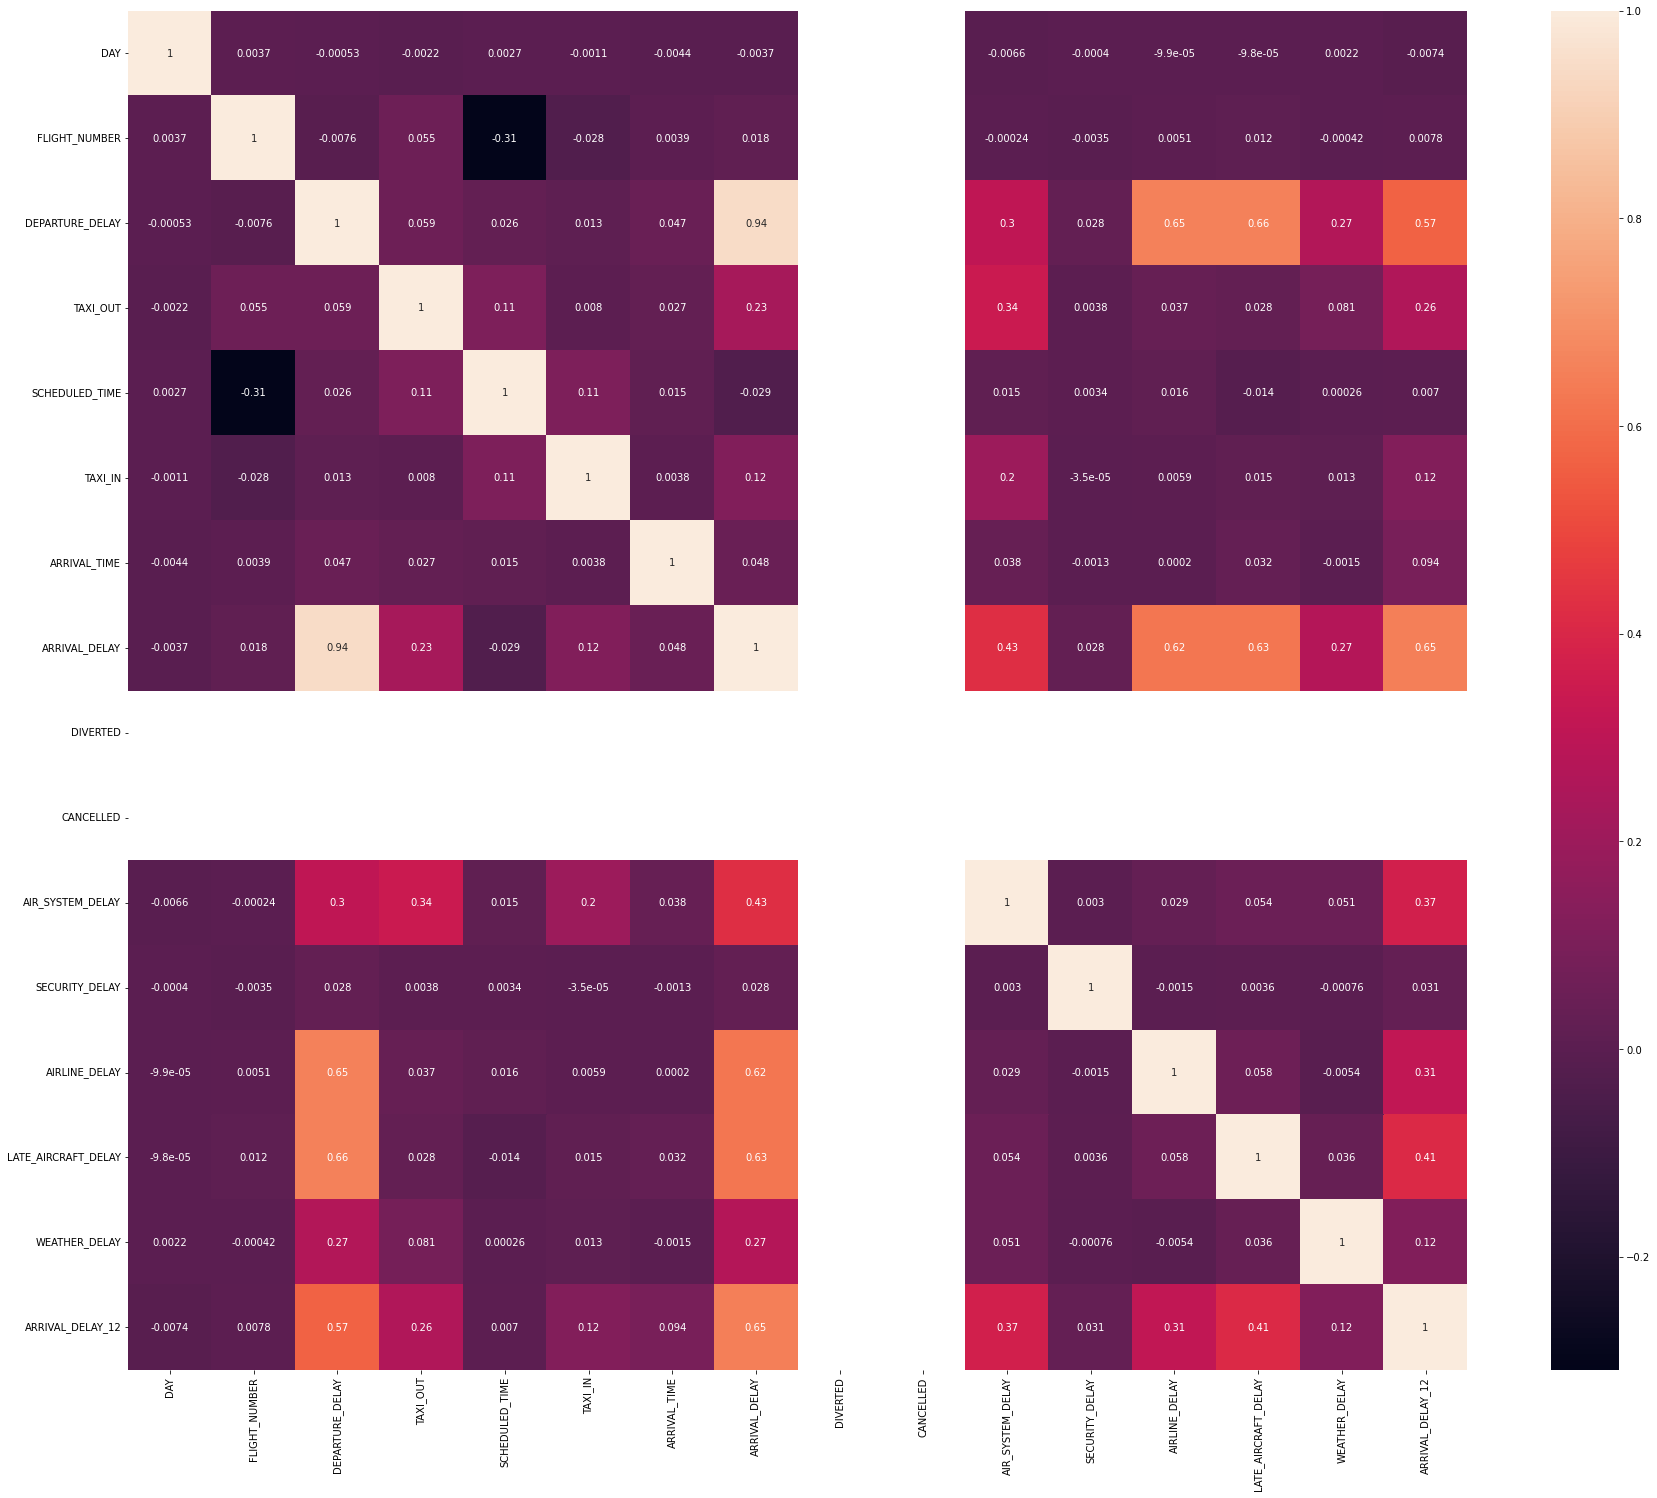

In [ ]:
fig,ax = plt.subplots(nrows =1, ncols = 1, figsize = (30,25))
corr = df1.corr()
sns.heatmap(corr, annot = True)

In [ ]:
df1.to_csv('data_temp1.csv',encoding='utf-8-sig')

In [ ]:
np.random.seed(10)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.3)

In [ ]:
train.to_csv('data_train.csv',encoding='utf-8-sig')

In [ ]:
np.random.seed(10)
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features = 2**13, input_type="string")

X_train = fh.transform(np.asarray(train.iloc[:,0:-1].astype(str)))
y_train = train["ARRIVAL_DELAY_12"]
y_test = test["ARRIVAL_DELAY_12"]
X_test = fh.transform(np.asarray(test.iloc[:,0:-1].astype(str)))

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    return plt

In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

def ROC(label,result):
    # Compute ROC curve and area the curve
    Y = np.array(label)
    fpr, tpr, thresholds = roc_curve(Y, result)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    # Plot ROC curve
    #pl.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
np.random.seed(10)
model1= BernoulliNB()
tuning_parameters = {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1]}
clf1 = GridSearchCV(model1,tuning_parameters , cv=3,n_jobs=-1)
clf1.fit(X_train,y_train)
print('The Best Parameter is',clf1.best_params_)
print('The testing score is',clf1.score(X_test,y_test))
print('Precision and Recall values with best parameters for Bernoulli Naive Bayes Classifier')
print(classification_report(y_test,clf1.predict(X_test)))
print('Confusion Matrix for Bernoulli Naive Bayes Classifier:')
print(confusion_matrix(y_test, clf1.predict(X_test)))
plot_confusion_matrix(confusion_matrix(y_test,clf1.predict(X_test)),[0,1],normalize=True)

In [ ]:
np.random.seed(10)
clf2= RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=32, random_state=10, class_weight='balanced')
clf2.fit(X_train,y_train)
print('The testing score is',clf2.score(X_test,y_test))
print('Precision and Recall values for Random Forest Classifier')
print(classification_report(y_test,clf2.predict(X_test)))
print('Confusion Matrix for Random Forest Classifier:')
print(confusion_matrix(y_test, clf2.predict(X_test)))
plot_confusion_matrix(confusion_matrix(y_test,clf2.predict(X_test)),[0,1],normalize=True)